In [2]:
import pandas as pd
df1 = pd.read_csv(r"C:\Users\hp\Downloads\Datascience Projects\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\hp\Downloads\Datascience Projects\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\hp\Downloads\Datascience Projects\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\hp\Downloads\Datascience Projects\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\hp\Downloads\Datascience Projects\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# merging all the datasets
merged_df = pd.concat([df1,df2,df3,df4,df5],ignore_index = True)

In [4]:
merged_df.shape

(923775, 11)

In [5]:
merged_df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923775 entries, 0 to 923774
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                923775 non-null  object 
 1   town                 923775 non-null  object 
 2   flat_type            923775 non-null  object 
 3   block                923775 non-null  object 
 4   street_name          923775 non-null  object 
 5   storey_range         923775 non-null  object 
 6   floor_area_sqm       923775 non-null  float64
 7   flat_model           923775 non-null  object 
 8   lease_commence_date  923775 non-null  int64  
 9   resale_price         923775 non-null  float64
 10  remaining_lease      214725 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.5+ MB


In [7]:
merged_df['remaining_lease'].fillna('0',inplace = True)

In [8]:
merged_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [9]:
merged_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [10]:
merged_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
#replacing the multi-generation with MULTI GENERATION
merged_df['flat_type'] = merged_df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
merged_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [12]:
merged_df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [13]:
merged_df['block'].unique()

array(['309', '216', '211', ..., '606C', '605D', '460B'], dtype=object)

In [14]:
#convertingg the block column to int
merged_df['block'] = merged_df['block'].astype(str)
merged_df['block'] = merged_df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [15]:
merged_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [16]:
merged_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [17]:
merged_df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [18]:
#splitting month column to year and month
merged_df['reg_year'] = merged_df['month'].apply(lambda x: int(x.split('-')[0]))
merged_df['reg_month'] = merged_df['month'].apply(lambda x: int(x.split('-')[1]))

In [19]:
merged_df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [20]:
merged_df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


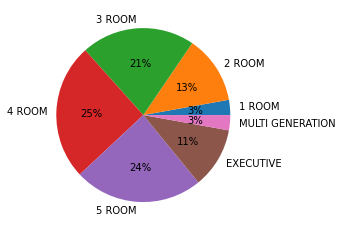

In [21]:
import matplotlib.pyplot as plt
temp = pd.DataFrame(merged_df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

c:\Users\hp\Downloads\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:title={'center':'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

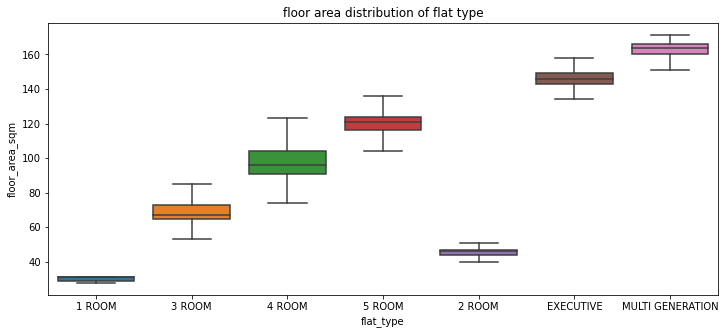

In [22]:
import seaborn as sns


plt.figure(figsize = (12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = merged_df, showfliers = False)

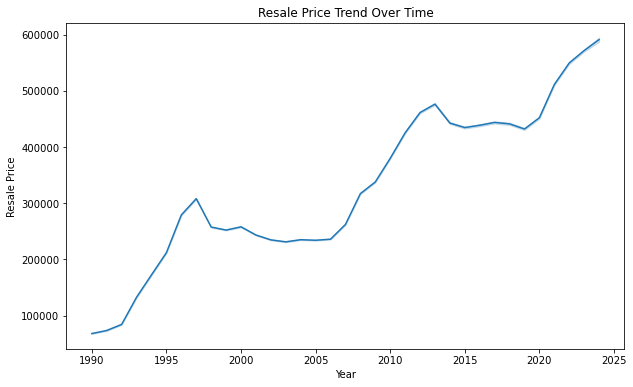

In [23]:
merged_df['lease_commence_date'] = merged_df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=merged_df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [25]:
# Use LabelEncoder to convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_df['street_name'] = label_encoder.fit_transform(merged_df['street_name'])
merged_df['flat_type'] = label_encoder.fit_transform(merged_df['flat_type'])
merged_df['flat_model'] = label_encoder.fit_transform(merged_df['flat_model'])
merged_df['town'] = label_encoder.fit_transform(merged_df['town'])
merged_df['storey_range'] = label_encoder.fit_transform(merged_df['storey_range'])
# merged_df.drop(columns='month', inplace=True)
merged_df.head(1)




,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,1990-01,0,0,309,13,5,31.0,7,1977,9000.0,0,1990,1


In [ ]:
merged_df.drop("remaining_lease",inplace = True , axis = 1)


In [ ]:
merged_df['street_name'].unique()

array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

<AxesSubplot:title={'center':'Correlation Matrix'}>

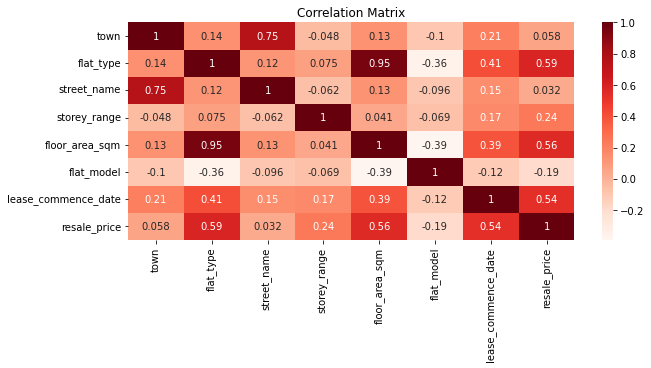

In [ ]:
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price']
plt.figure(figsize = (10,4))
plt.title('Correlation Matrix')
sns.heatmap(merged_df[feature_cols].corr(),cmap="Reds", annot = True)

In [42]:
# Split the data into features and target
x = merged_df[['town','flat_type','block','street_name','storey_range','flat_model','lease_commence_date','reg_year','reg_month']]
y = merged_df['resale_price']

In [43]:
print(x)

        town  flat_type block  street_name  storey_range  flat_model  \
0          0          0   309           13             5           7   
1          0          0   309           13             2           7   
2          0          0   309           13             5           7   
3          0          0   309           13             4           7   
4          0          2   216           13             2          20   
...      ...        ...   ...          ...           ...         ...   
923770    26          5   652          556             4           5   
923771    26          5   392          558             4           5   
923772    26          5   324          561             2           5   
923773    26          5   326          563             2          15   
923774    26          5   826          575             2          15   

        lease_commence_date  reg_year  reg_month  
0                      1977      1990          1  
1                      1977      

In [44]:
print(y)

0            9000.0
1            6000.0
2            8000.0
3            6000.0
4           47200.0
            ...    
923770    1080000.0
923771     780888.0
923772     830000.0
923773     880000.0
923774     900000.0
Name: resale_price, Length: 923775, dtype: float64


# Model Selection and Training

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,reg_year,reg_month
0,0,0,309,13,5,7,1977,1990,1
1,0,0,309,13,2,7,1977,1990,1
2,0,0,309,13,5,7,1977,1990,1
3,0,0,309,13,4,7,1977,1990,1
4,0,2,216,13,2,20,1976,1990,1
...,...,...,...,...,...,...,...,...,...
923770,26,5,652,556,4,5,1992,2024,4
923771,26,5,392,558,4,5,1988,2024,4
923772,26,5,324,561,2,5,1988,2024,4
923773,26,5,326,563,2,15,1988,2024,4


# Model Evaluation

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61402.364503188815
MSE = 6817889567.709993
RMSE  = 82570.51270102417
R2 Score = 0.7634501564256692


In [48]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')



MAE is - 20284.633659649655
MAE is - 932279591.9563926
RMSE is - 30533.25387108935
R2 Score is - 0.9676541267712411


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 32782.87375019575
MAE is - 2290087956.723857
RMSE is - 47854.8634594631
Accuracy Score is - 0.9205443352294659


# Saving the Decision Tree Model

In [52]:
import pickle

In [53]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)
with open ('lr.pkl','wb') as file:
    pickle.dump(linear_regression, file)
with open ('rf.pkl','wb') as file:
    pickle.dump(rf_regressor, file)